# Scaffold analysis

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import csv

In [2]:
with open('Epidermal_growth_factor_receptor_erbB1_IC50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    EGFR_ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        # get the standardized pChEMBL activity measure for future use
        pchembl = m['pChEMBL Value']
        if not pchembl:
            # some don't have any comparable pChEMBL value, just assign them very low value
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl)) # save the value into mol instance
        EGFR_ligands.append(mol)

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [13:11:04] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [13:11:04] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [13:11:04] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [13:11:04] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [13:11:04] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [13:11:04] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [13:11:04] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [13:11:04] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [13:11:04] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [13:11:04] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
RDKit ERROR: 
RDKit ERROR: [13:11:04] ERROR: Could not sanitize molecule ending on line 261581
RDKit ERROR

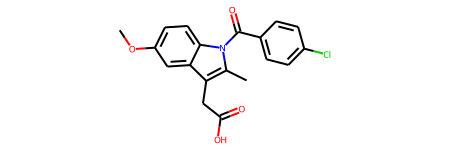

In [4]:
EGFR_ligands[2307]

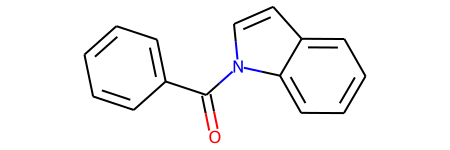

In [6]:
from rdkit.Chem.Scaffolds import MurckoScaffold
scaffold1 = MurckoScaffold.GetScaffoldForMol(EGFR_ligands[2307])
scaffold1

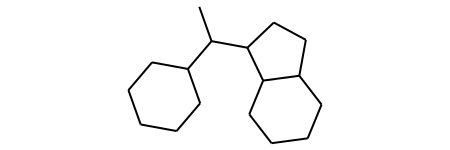

In [7]:
scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
scaffold2

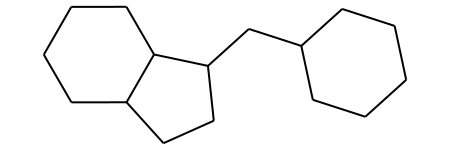

In [8]:
scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
scaffold3

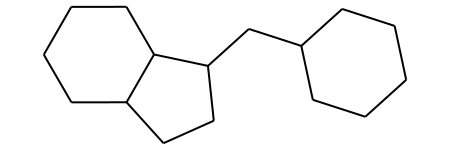

In [10]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff
scaffold(EGFR_ligands[2307])

In [11]:
drugbank_scaffolds = [scaffold(drug) for drug in drugs]
drugbank_scaffolds[:20]

RDKit ERROR: [13:11:06] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [13:40:13] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [13:40:13] Explicit valence for atom # 62 C, 6, is greater than permitted
RDKit ERROR: [13:40:13] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [13:40:14] Explicit valence for atom # 31 C, 6, is greater than permitted
RDKit ERROR: [13:40:14] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [13:40:15] Explicit valence for atom # 23 C greater than permitted
RDKit ERROR: [13:40:15] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [13:40:15] Explicit valence for atom # 7 C, 5, is greater than permitted
RDKit ERROR: [13:40:15] Explicit valence for atom # 40 C, 6, is greater than permitted
RDKit ERROR: [13:40:15] Explicit valence for atom # 1 C, 6, is greater than permitted
RDKit ERROR: [13:40:15] Explicit valence for atom # 31

 None,

In [12]:
drugbank_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drugbank_scaffolds) if mol]
drugbank_scaffolds_smiles[:20]

[(0,
  'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1'),
 (1,
  'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1'),
 (2, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (3,
  'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1'),
 (4, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'),
 (5, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (6, 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1'),
 (7, 'C1CCCCC1'),
 (9, 'C1CCC(CCC2CCC3CCCCC3C2)CC1'),
 (10, 'C1CCCC1'),
 (11, 'C1CCC2C(C1)CCC2C1CCCC1'),
 (12, ''),
 (13, 'C1CCCCC1'),
 (14, 'C1CC2CCCC2C1'),
 (15, ''),
 (16, ''),
 (17, ''),
 (18, 'C1CCCC1'),
 (19, ''),
 (20, '')]

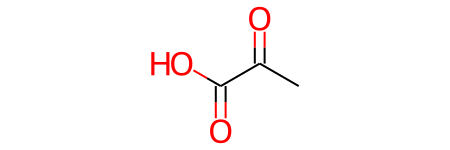

In [13]:
drugs[12]

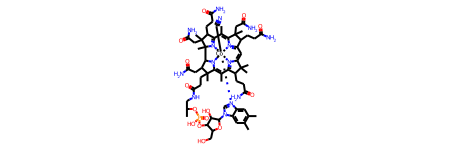

In [14]:
drugs[8]

In [16]:
scaffolds2drugs = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles}
for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles:
    scaffolds2drugs[scaffoldsmiles].append(drug_idx)

In [17]:
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]
len(scaffold_drugcount), scaffold_drugcount[:20]

(1545,
 [('C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1',
   2),
  ('C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1', 3),
  ('C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1', 1),
  ('C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1', 1),
  ('C1CCCCC1', 1039),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
  ('C1CCCC1', 188),
  ('C1CCC2C(C1)CCC2C1CCCC1', 165),
  ('', 976),
  ('C1CC2CCCC2C1', 15),
  ('C1CCC(CCC2CCCC3CCCC32)CC1', 28),
  ('C(CCCCCCCCCC1CCCCC1)CCCCCCCCC1CCCCC1', 2),
  ('C1CCC2CC3CCCCC3CC2C1', 57),
  ('C1CCC2CCCC2C1', 192),
  ('C1CCC(CC2CCCC2)CC1', 74),
  ('C(CCCC1CCC(C2CCCCC2)C1)CCCC1CCC(C2CCC3CCCCC32)C1', 17),
  ('C1CCC2CCCCC2C1', 170),
  ('C1CCC(C2CCCCC2C2CCCC2)CC1', 1)])

In [18]:
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)
scaffold_drugcount[:20]

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 170),
 ('C1CCC2C(C1)CCC2C1CCCC1', 165),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106),
 ('C1CCC(C2CCCCC2)CC1', 105),
 ('C1CCC(CC2CCCC2)CC1', 74),
 ('C1CCC(CCCC2CCCCC2)CC1', 66),
 ('C1CCC2CC3CCCCC3CC2C1', 57),
 ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
 ('C1CCC(CCCCC2CCCCC2)CC1', 53),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 48),
 ('C1CCC(CCC2CCCC2)CC1', 43),
 ('C1CCC(C2CCC3CCCCC3C2)CC1', 41),
 ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 34)]

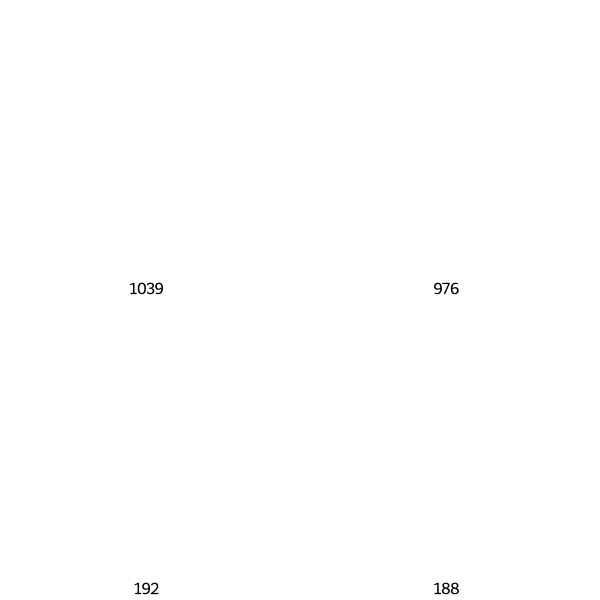

In [28]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_drugcount[:4]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_drugcount[:4]])

In [21]:
EGFR_scaffolds_smiles = [(i, Chem.MolToSmiles(scaffold(ligand))) for i, ligand in enumerate(EGFR_ligands)]
EGFR_scaffolds_smiles[:20]

[(0, 'C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1'),
 (1, 'C1CCC(CC2CCCC3CCC(CCCCCC4CCCC4)CC32)CC1'),
 (2, 'C1CCC(CCCC2CCCC(CC3CCC(C4CCCCC4)CC3)C2)CC1'),
 (3, 'C1CCC(CC2CCCC(CC3CCC(C4CCCCC4)CC3)C2)CC1'),
 (4, 'C1CCC(CC2CCC3CC(C4CCCC5CCCCC54)CCC23)CC1'),
 (5, 'C1CCC(C2CCC(C3CCC(CC4CCCC(C5CCC6CCCCC65)C4)CC3)CC2)CC1'),
 (6, 'C1CCC(CC2CCC(CCC3CCCC(C4CCCCC4)C3)CC2)CC1'),
 (7, 'C1CCC(CCCC2CCC(C3CCC4CCCCC43)CC2)CC1'),
 (8, 'C1CCC(CC2CCCC3CCCCC32)CC1'),
 (9, 'C1CCC(CC2CCCC3CCCCC32)CC1'),
 (10, 'C1CCCCC(CCCCC2CCC3CCCC(CC4CCCCC4)C3C2)CCC1'),
 (11, 'C1CCC(C2CCC(C3CCC(CC4CCCC(C5CCC6CCCCC65)C4)CC3)CC2)CC1'),
 (12, 'C1CCC(C2CCC3CCCCC3C2)CC1'),
 (13, 'C1CCC(CCCC2CCCCC2)CC1'),
 (14, 'C1CCC(CC2CCCCC2)CC1'),
 (15, 'C1CCC(CC2CCCC3CCC(CC4CCCCC4)C32)CC1'),
 (16, 'C1CCC(CC2CCCC(CC3CCC(C4CCCCC4)CC3)C2)CC1'),
 (17, 'C1CCC(CCC2CCC(CCC3CC4CCCC(CC5CCC6C(CC7CCCCC7)CCC6C5)C4C3)C2)CC1'),
 (18, 'C1CCC(C2CC(C3CCCCC3)C(C3CCCC4CCCC43)C2)CC1'),
 (19, 'C1CCC(C2CC3CCCC(C4CC(C5CCCCC5)CC4C4CCCCC4)C3C2)CC1')]

In [29]:
scaffolds2ligands = {scaffoldsmiles:[] for ligand_idx, scaffoldsmiles in EGFR_scaffolds_smiles}
for ligand_idx, scaffoldsmiles in EGFR_scaffolds_smiles:
    scaffolds2ligands[scaffoldsmiles].append(ligand_idx)

In [30]:
scaffold_ligandcount = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds2ligands.items()]
scaffold_ligandcount.sort(key=lambda x: x[1], reverse=True)
len(scaffold_ligandcount), scaffold_ligandcount

(1664,
 [('C1CCC(CC2CCCC3CCCCC32)CC1', 1810),
  ('C1CCC(CC2CCCC(C3CCC4CCCCC43)C2)CC1', 358),
  ('C1CCC(CC2CCCC(CC3CCC(C4CCCCC4)CC3)C2)CC1', 308),
  ('C1CCCCC1', 307),
  ('C1CCC(CCCCC2CCC3CCCC(CC4CCCCC4)C3C2)CC1', 289),
  ('C1CCC(CCC2CCCCC2)CC1', 247),
  ('C1CCC(C2CCC3CCCCC3C2)CC1', 187),
  ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 186),
  ('C1CCC(CCC2CCC3C(CC4CCCCC4)CCCC3C2)CC1', 172),
  ('C1CCC(CCC2CCC(CC3CCCC4CCCCC43)CC2)CC1', 153),
  ('C1CCC(CC2CCCC3CCCC32)CC1', 143),
  ('C1CCC(C2CCC(CC3CCC4CCCC(C5CCCCC5)C4C3)CC2)CC1', 140),
  ('C1CCC(CCC2CCCC3CC(C4CCCCC4)CC23)CC1', 132),
  ('C1CCC(CC2CCCC3CC4CCCC4CC23)CC1', 120),
  ('C1CCC(C2CCC3CCCCC32)CC1', 112),
  ('C1CCC(CCCCCC2CCC3CCCC(CC4CCCCC4)C3C2)CC1', 110),
  ('C1CCC(CC2CCCC3CC4CCCCC4CCC23)CC1', 110),
  ('C1CCC(CCCC2CCCCC2)CC1', 109),
  ('C1CCC(CCC2CCCC(C3CC4CCCCC4C3C3CCCC(CC4CCC(C5CCC(C6CCCCC6)CC5)CC4)C3)C2)CC1',
   108),
  ('C1CCC(CCC2CCC(CC3CCCC4CCC(C5CCCC5)CC43)CC2)CC1', 104),
  ('C1CCC(CCC2CCCC3CC(C4CCCCC4)C(C4CCCCC4)C23)CC1', 98),
  ('C1CC

#### the most prevalent scaffolds:

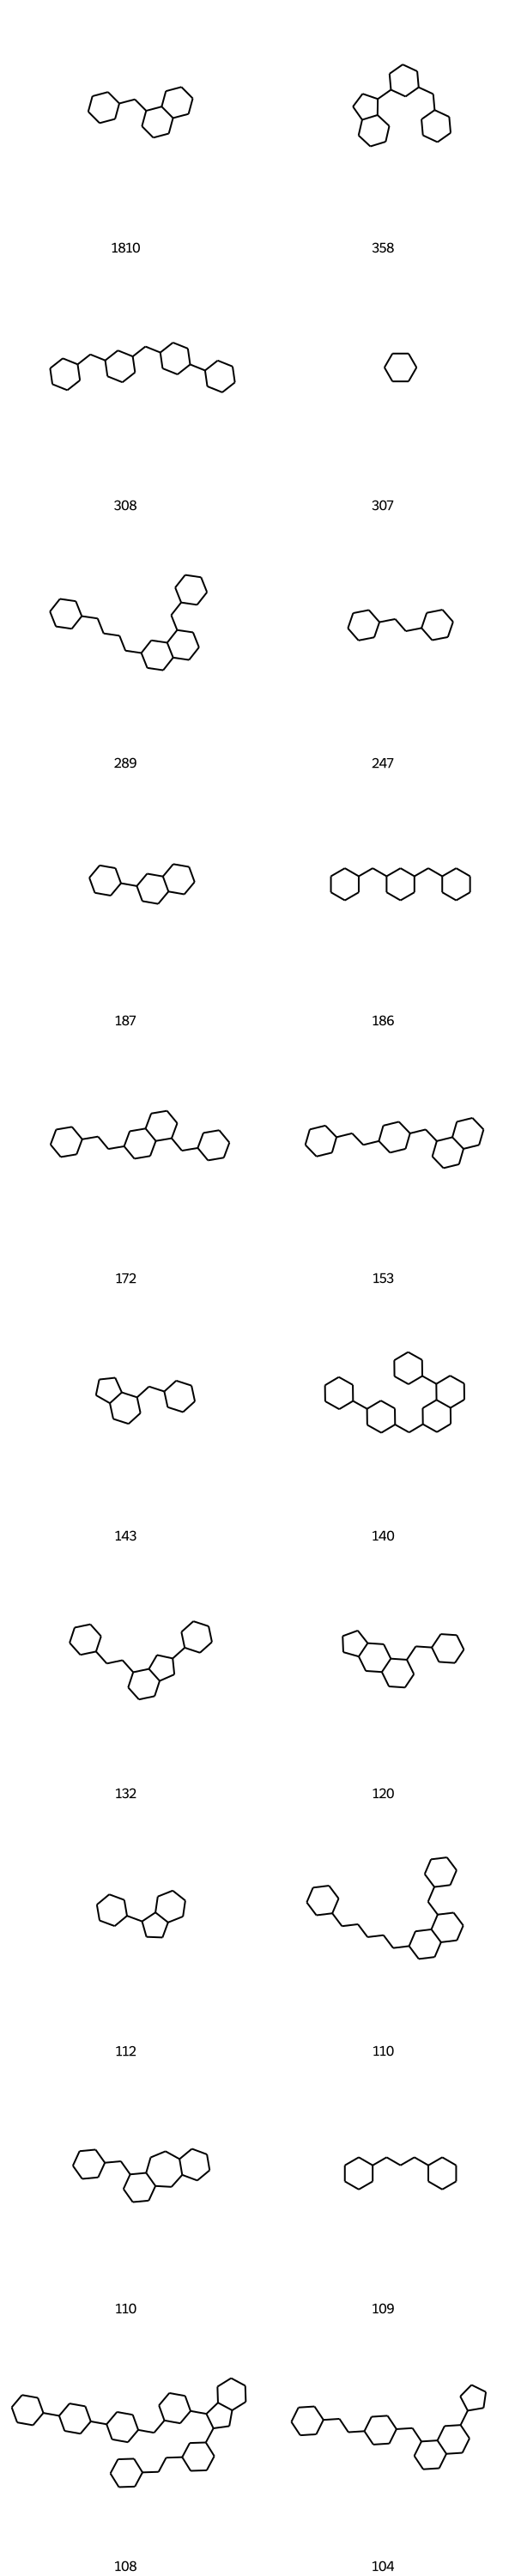

In [31]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_ligandcount[:20]],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_ligandcount[:20]])

## Scaffold-based diversity picking

In [32]:
scaffold_representatives = {}
for scaffold, ligands in scaffolds2ligands.items():
    scaffold_representatives[scaffold] = sorted(ligands,
                                                key=lambda x: EGFR_ligands[x].GetProp('pChEMBL'),
                                                reverse=True)[0]
len(scaffold_representatives), scaffold_representatives

(1664,
 {'C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1': 3876,
  'C1CCC(CC2CCCC3CCC(CCCCCC4CCCC4)CC32)CC1': 1,
  'C1CCC(CCCC2CCCC(CC3CCC(C4CCCCC4)CC3)C2)CC1': 10604,
  'C1CCC(CC2CCCC(CC3CCC(C4CCCCC4)CC3)C2)CC1': 802,
  'C1CCC(CC2CCC3CC(C4CCCC5CCCCC54)CCC23)CC1': 2225,
  'C1CCC(C2CCC(C3CCC(CC4CCCC(C5CCC6CCCCC65)C4)CC3)CC2)CC1': 1188,
  'C1CCC(CC2CCC(CCC3CCCC(C4CCCCC4)C3)CC2)CC1': 6,
  'C1CCC(CCCC2CCC(C3CCC4CCCCC43)CC2)CC1': 7,
  'C1CCC(CC2CCCC3CCCCC32)CC1': 6878,
  'C1CCCCC(CCCCC2CCC3CCCC(CC4CCCCC4)C3C2)CCC1': 12737,
  'C1CCC(C2CCC3CCCCC3C2)CC1': 8441,
  'C1CCC(CCCC2CCCCC2)CC1': 5402,
  'C1CCC(CC2CCCCC2)CC1': 9008,
  'C1CCC(CC2CCCC3CCC(CC4CCCCC4)C32)CC1': 8343,
  'C1CCC(CCC2CCC(CCC3CC4CCCC(CC5CCC6C(CC7CCCCC7)CCC6C5)C4C3)C2)CC1': 74,
  'C1CCC(C2CC(C3CCCCC3)C(C3CCCC4CCCC43)C2)CC1': 18,
  'C1CCC(C2CC3CCCC(C4CC(C5CCCCC5)CC4C4CCCCC4)C3C2)CC1': 12268,
  'C(CCCCC1CCCCC1)CCCC1CCCCC1': 20,
  'C1CCC(CC(CC2CCCCC2)C2CCCCC2)CC1': 6664,
  'C1CCCCC1': 10473,
  'C1CCC(CCC2CCCCC2)CC1': 3881,
  'C1CCC(C2CCC3CCCC(C4CCC

In [34]:
# prep for our amazing visualization of scaffolds and representative structures side by side :)
scaffold_representatives4visualization = []
for scaffold, ligandcount in scaffold_ligandcount:
    mol = Chem.MolFromSmiles(scaffold)
    mol.SetProp('legend', str(ligandcount) + " ligands")
    scaffold_representatives4visualization.append(mol)
    representative_mol = EGFR_ligands[scaffold_representatives[scaffold]]
    representative_mol.SetProp('legend', "#{} | pChEMBL {}".format(str(scaffold_representatives[scaffold]),
                                                            representative_mol.GetProp('pChEMBL')))
    scaffold_representatives4visualization.append(representative_mol)
len(scaffold_representatives4visualization), scaffold_representatives4visualization[:20]

(3328,
  <rdkit.Chem.rdchem.Mol at 0x7fb6f9151030>])

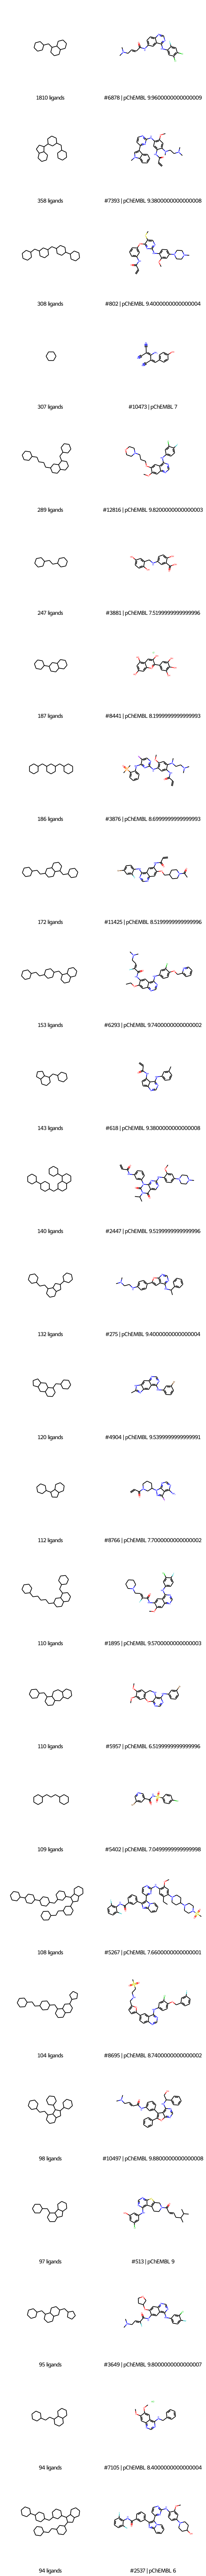

In [35]:
Draw.MolsToGridImage(scaffold_representatives4visualization[:50],
                     molsPerRow=2, subImgSize=(300,300),
                     legends=[mol.GetProp('legend')
                              for mol in scaffold_representatives4visualization[:50]])